In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import numpy as np
import statsmodels.api as sm

def lin_reg(y):
    X = np.linspace(0, 1, len(y))
    X = sm.add_constant(X)
    return sm.OLS(y, X).fit()

In [84]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=20, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))
    
    plt.figure(figsize=(w,h))
    plt.hist(text['offsets'], bins, (0,1))
    plt.show()

In [94]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('had.json')

Saratoga trunk (Edna Ferber, 1941)


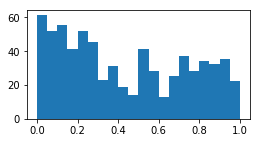

In this our life (Ellen Anderson Gholson Glasgow, 1941)


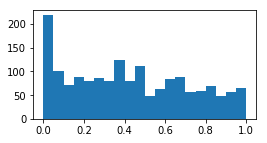

Green centuries (Caroline Gordon, 1941)


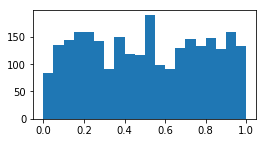

The mutineers (Charles Boardman Hawes, 1941)


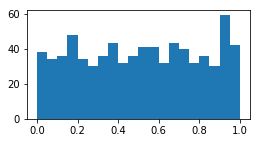

Star spangled summer (Janet Lambert, 1941)


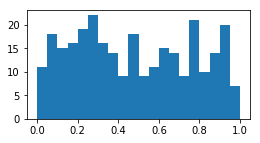

The wife of Martin Guerre (Janet Lewis, 1941)


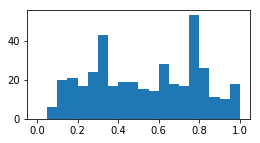

The deadly truth (Helen McCloy, 1941)


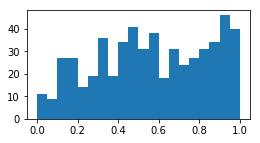

The metal monster (Abraham Merritt, 1941)


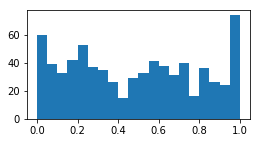

The harp and the blade (John Myers Myers, 1941)


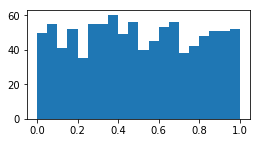

The puzzle of the happy hooligan (Stuart Palmer, 1941)


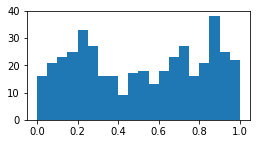

In [95]:
from itertools import islice

data = []
for text in islice(ds.texts(), 10):
    plot_histogram(text)

In [98]:
from numpy.random import multinomial

def sample_series(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [99]:
from scipy import stats

def first_bin_zscore(text, bins=20):

    y, _, _, _ = stats.histogram(text['offsets'], bins, (0, 1))

    expected = y.sum() / len(y)
    samples = sample_series(np.full(len(y), expected))

    avg_std = samples.std(1).mean()

    return (y[0]-expected)/avg_std

In [111]:
data = []
for text in ds.texts():
    zscore = first_bin_zscore(text)
    data.append((zscore, text['year'], text))

In [112]:
import pandas as pd

df = pd.DataFrame(data, columns=('zscore', 'year', 'text'))

In [128]:
df.sort_values('zscore', ascending=False)

,zscore,year
14340,23.254053,1991
10286,16.098131,1895
18609,15.532929,1966
1,15.347503,1941
2292,14.189203,1994
10656,14.129396,1899
6436,13.947039,1917
11105,13.708629,1954
16541,13.310569,1945
901,13.103096,1986


In [136]:
X = df['year']
y = df['zscore']

X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 zscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     793.3
Date:                Fri, 28 Apr 2017   Prob (F-statistic):          4.86e-172
Time:                        10:44:16   Log-Likelihood:                -59945.
No. Observations:               26971   AIC:                         1.199e+05
Df Residuals:                   26969   BIC:                         1.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8400      0.569    -27.834      0.000     -16.955     -14.725
year           0.0084      0.000     28.165      0.000       0.008       0.009
==============================================================================
Omnibus:                     3508.904   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7804.964
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                       5.120   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

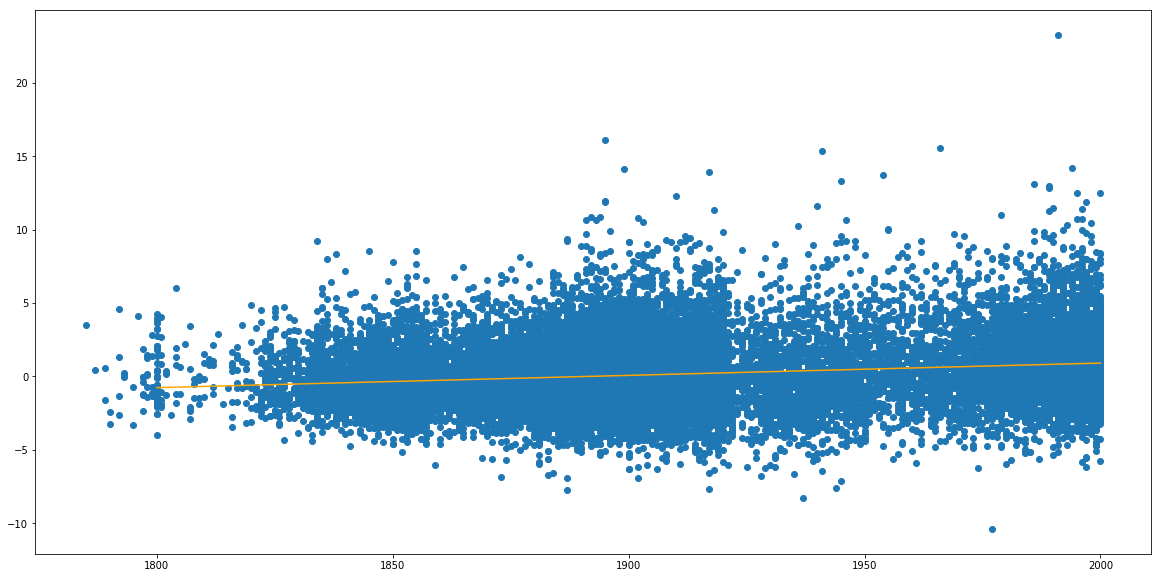

In [145]:
plt.figure(figsize=(20, 10))
plt.scatter(df['year'], df['zscore'])

x1 = 1800
x2 = 2000
y1 = fit.params[1]*x1 + fit.params[0]
y2 = fit.params[1]*x2 + fit.params[0]

plt.plot([x1, x2], [y1, y2], c='orange')

plt.show()

In [143]:
y = fit.params[1]*2000 + fit.params[0]
y

0.90538026805817218

Beyond deserving (Sandra Jean Scofield, 1991)


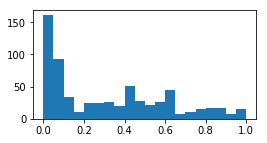

The Banker and the Typewriter: Nevada McNeill (Nevada McNeill, 1895)


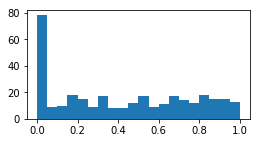

Tai-Pan (James Clavell, 1966)


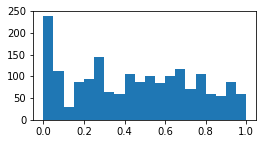

In this our life (Ellen Anderson Gholson Glasgow, 1941)


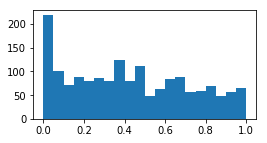

Grand passion (Jayne Castle, 1994)


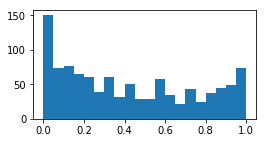

Love and Politics: A Social Romance of a Prominent Orator and a Society Queen: Reproductions of Their Letters and Poems: By Neile Bevans (Nelie Bevans, 1899)


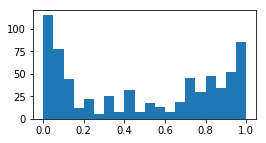

His Family: By Ernest Poole (Ernest Poole, 1917)


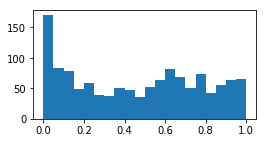

The star beast (Robert A. Heinlein, 1954)


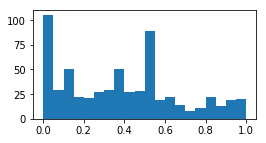

Sparkling cyanide (Agatha Christie, 1945)


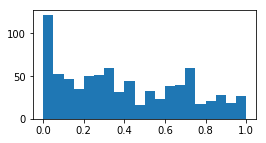

The seventh secret (Irving Wallace, 1986)


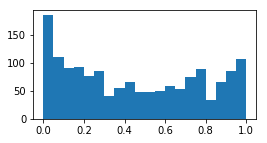

Kiss of the night wind (Janelle Taylor, 1989)


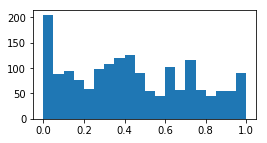

The education of Harriet Hatfield (May Sarton, 1989)


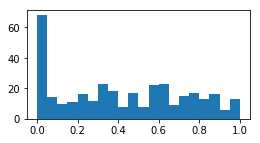

After the parade (Dorothy Garlock, 2000)


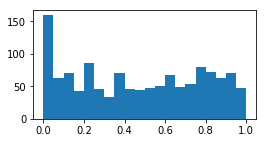

Lasher (Anne Rice, 1995)


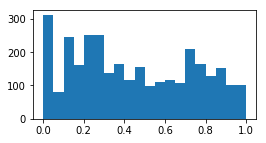

Lost Face (Jack London, 1910)


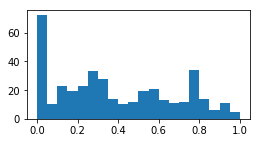

The Red Badge of Courage: An Episode of the American Civil War: By Stephen Crane (Stephen Crane, 1895)


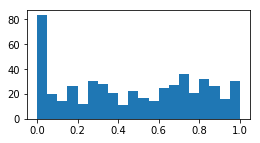

The shadow matrix (Marion Zimmer Bradley, 1997)


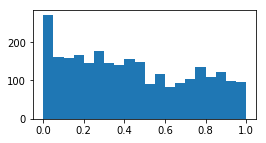

The red badge of courage (Stephen Crane, 1895)


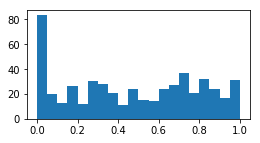

And then there were none (Agatha Christie, 1940)


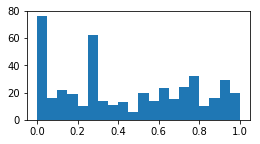

Always and forever (Cynthia Freeman, 1990)


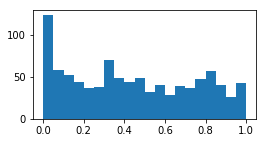

House of smoke (J. F Freedman, 1996)


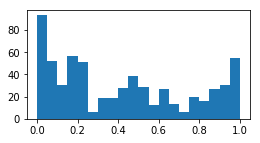

The Red One: By Jack London (Jack London, 1918)


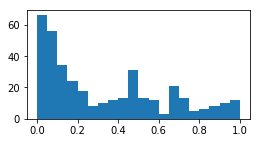

So worthy my love (Kathleen E Woodiwiss, 1989)


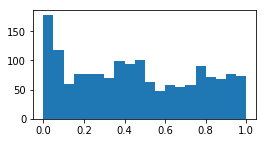

The dancers of Arun (Elizabeth A Lynn, 1979)


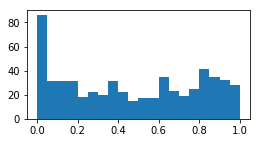

The Free Soil Prophet of the Verdigris: By R. E. Heller … (Robley Heller, 1894)


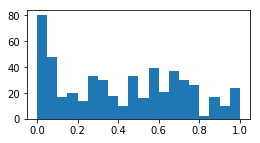

The Heirs of Bradley House: By Amanda M. Douglas … (Amanda Douglas, 1892)


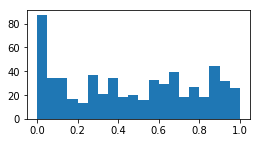

The Surprises of an Empty Hotel: A Novel: By Archibald Clavering Gunter (Archibald Gunter, 1902)


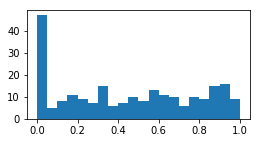

Topping from below (Laura Reese, 1995)


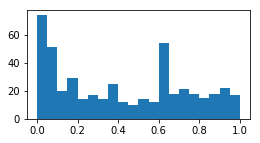

The Stainless Steel Rat goes to hell (Harry Harrison, 1996)


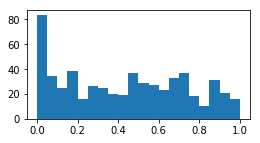

Return to Jalna (Mazo De la Roche, 1946)


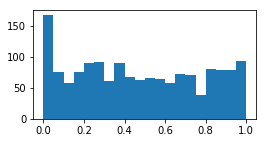

The Man from Mars: His Morals, Politics and Religion: By Thomas Blot (Thomas Blot, 1891)


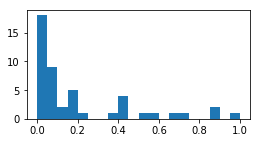

Earth Revisited: By Byron A. Brooks (Byron Brooks, 1893)


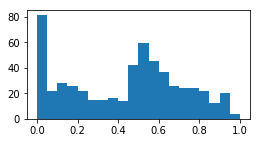

The untilled field (George Moore, 1903)


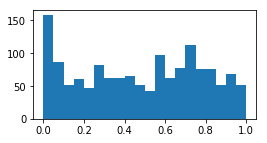

Dinosaur summer (Greg Bear, 1998)


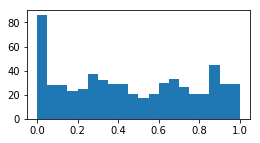

The robin & the kestrel (Mercedes Lackey, 1993)


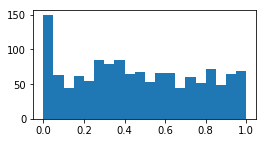

Nightwood (Djuna Barnes, 1936)


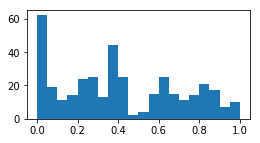

The recognitions (William Gaddis, 1955)


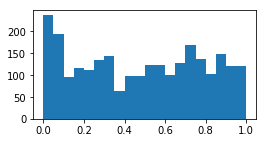

Ten North Frederick (John O'Hara, 1955)


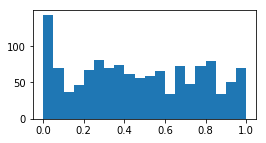

The enchantment of Lily Dahl (Siri Hustvedt, 1996)


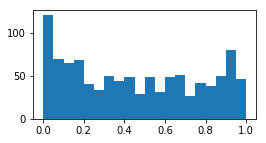

Wildest dreams (Jennifer Blake, 1992)


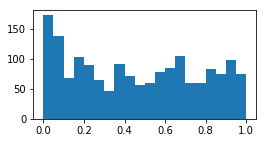

Her Senator: A Novel: By Archibald Clavering Gunter … (Archibald Gunter, 1896)


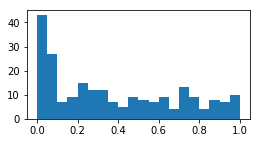

The unwilling heiress (Deborah Fruchey, 1986)


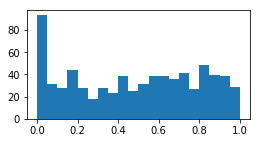

The missing Madonna (Carol Anne O'Marie, 1988)


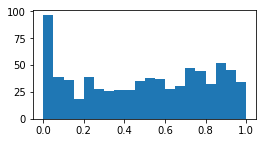

A Change of Opinion: By John Rupert Farrell (John Farrell, 1920)


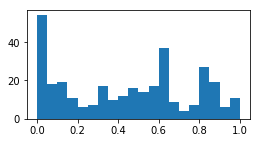

Power of a woman (Barbara Taylor Bradford, 1997)


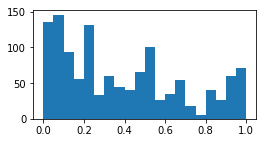

New moon rising (Eugenia Price, 1969)


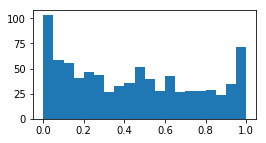

Juggernaut: A Veiled Record: By George Cary Eggleston and Dolores Marbourg (George Eggleston, 1891)


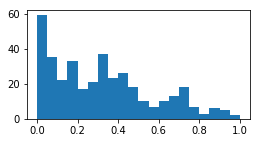

The witching hour (Anne Rice, 1990)


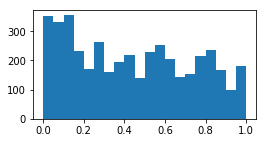

Death of the fox (George Garrett, 1971)


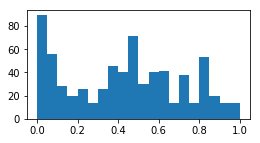

The Valiants of Virginia: By Hallie Erminie Rives (Mrs. Post Wheeler); Illustrated by André Castaigne (Hallie Rives, 1912)


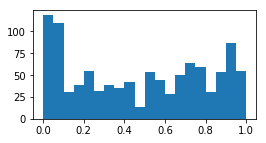

In [146]:
for text in df.sort_values('zscore', ascending=False)['text'].head(50):
    plot_histogram(text)